In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import random
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import getpass

In [14]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="30da7dcb7eeb4f038924583a5dc6dfb3",
                                                           client_secret="d4d0d4cc03c3457bb24ec6dd80b17441"))

In [2]:
client_id = getpass.getpass(prompt='client_id: ', stream=None)
client_secret = getpass.getpass(prompt='client_secret: ', stream=None)

client_id: ········
client_secret: ········


In [3]:
music = pd.read_csv('C://Users//Matthew//DA//Activities//Best_Song_Table.csv')

In [5]:
music.shape

(6832, 21)

In [21]:
music.tail(3)

,index,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,song_name,clusters
6829,6lX8VElLj8r0WOkv4Rs51f,0.919,0.734,11,-7.251,0,0.247,0.0597,0.0,0.135,0.500,145.025,184067,4,Proud,0
6830,0Y7NbvBfSD0Hr4e4QugQEU,0.841,0.512,0,-4.550,0,0.276,0.0470,0.0,0.128,0.129,140.042,155193,4,Hustlers & Shooters,0
6831,05KKOI0SXutMpliFutgwOx,0.931,0.598,2,-6.309,1,0.433,0.0541,0.0,0.103,0.475,139.944,137293,4,Toolie,0


In [4]:
music = music.drop(['Unnamed: 0','type','id','uri','track_href','analysis_url'],axis=1)

In [7]:
music.columns

Index(['index', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'song_name'],
      dtype='object')

In [8]:
music=music.drop_duplicates(subset=['index']).reset_index()

In [10]:
music.head(2)

,level_0,index,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,song_name
0,0,4kRDWcWcBlkcQNoWyWSkTg,0.498,0.949,11,-4.367,0,0.0575,0.000324,0.023200,0.0783,0.517,95.027,180691,3,The Shift
1,1,4cbmDY9GDPhipvX4kY9pRg,0.484,0.807,11,-5.386,1,0.0566,0.002990,0.000012,0.1070,0.253,120.223,180592,4,The Unknown


In [6]:
music.head()


,index,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,song_name
0,4kRDWcWcBlkcQNoWyWSkTg,0.498,0.949,11,-4.367,0,0.0575,0.000324,0.023200,0.0783,0.517,95.027,180691,3,The Shift
1,4cbmDY9GDPhipvX4kY9pRg,0.484,0.807,11,-5.386,1,0.0566,0.002990,0.000012,0.1070,0.253,120.223,180592,4,The Unknown
2,0eRQJmhphu5V6E5yKYpGRZ,0.295,0.911,4,-3.646,1,0.0961,0.000032,0.008090,0.2030,0.456,79.115,218934,4,Waiting
3,1qLhuyPkRwZzfJOkx6APMx,0.492,0.935,7,-5.436,1,0.0895,0.000275,0.022700,0.0896,0.603,172.010,159713,4,Deja Vu
4,67vEv74qFSiiCnYCX7HU4j,0.416,0.879,2,-4.892,1,0.0436,0.000068,0.004730,0.1230,0.401,154.927,210341,4,Without You


In [7]:
music_num = music.drop(['index','song_name'],axis=1)

In [19]:
music_num

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.498,0.949,11,-4.367,0,0.0575,0.000324,0.023200,0.0783,0.517,95.027,180691,3
1,0.484,0.807,11,-5.386,1,0.0566,0.002990,0.000012,0.1070,0.253,120.223,180592,4
2,0.295,0.911,4,-3.646,1,0.0961,0.000032,0.008090,0.2030,0.456,79.115,218934,4
3,0.492,0.935,7,-5.436,1,0.0895,0.000275,0.022700,0.0896,0.603,172.010,159713,4
4,0.416,0.879,2,-4.892,1,0.0436,0.000068,0.004730,0.1230,0.401,154.927,210341,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6827,0.854,0.663,1,-2.983,1,0.1160,0.112000,0.000000,0.2800,0.412,126.999,201137,4
6828,0.904,0.733,11,-7.036,0,0.3010,0.095100,0.000000,0.1360,0.519,145.012,184040,4
6829,0.919,0.734,11,-7.251,0,0.2470,0.059700,0.000000,0.1350,0.500,145.025,184067,4
6830,0.841,0.512,0,-4.550,0,0.2760,0.047000,0.000000,0.1280,0.129,140.042,155193,4


In [8]:
X_prep = StandardScaler().fit_transform(music_num)

In [21]:
pd.DataFrame(X_prep).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.008421,0.653746,1.618534,0.411740,-1.545603,-0.438367,-0.434230,-0.257460,-0.803059,0.382195,-1.018850,-0.458967,-2.135794
1,-0.089034,-0.080272,1.618534,0.122676,0.646997,-0.445725,-0.420353,-0.368118,-0.649182,-0.753636,-0.238134,-0.460248,0.207132
2,-1.177315,0.457319,-0.304853,0.616269,0.646997,-0.122814,-0.435749,-0.329568,-0.134471,0.119749,-1.511894,0.035723,0.207132
3,-0.042970,0.581378,0.519456,0.108492,0.646997,-0.176768,-0.434485,-0.259846,-0.742473,0.752200,1.366522,-0.730327,0.207132
4,-0.480585,0.291906,-0.854392,0.262811,0.646997,-0.551999,-0.435563,-0.345602,-0.563397,-0.116882,0.837193,-0.075432,0.207132


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

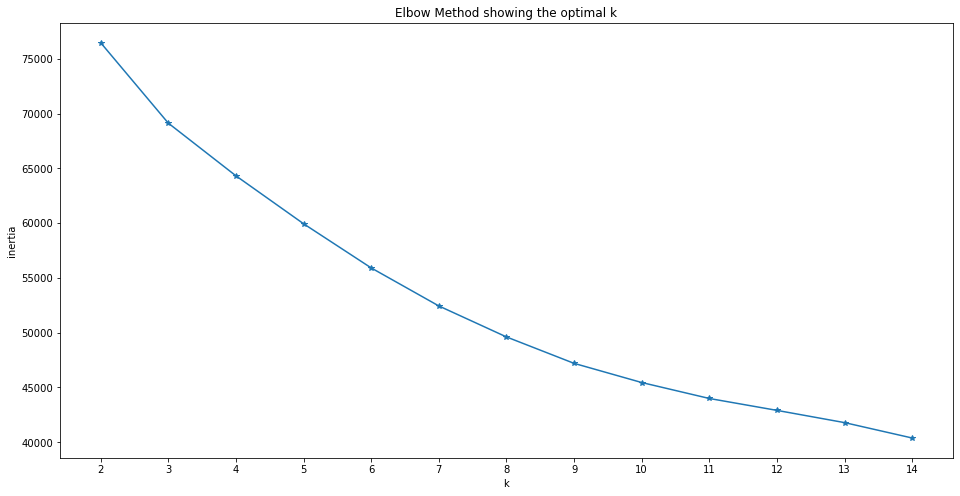

In [23]:
import numpy as np
K = range(2, 15)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, marker = '*')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

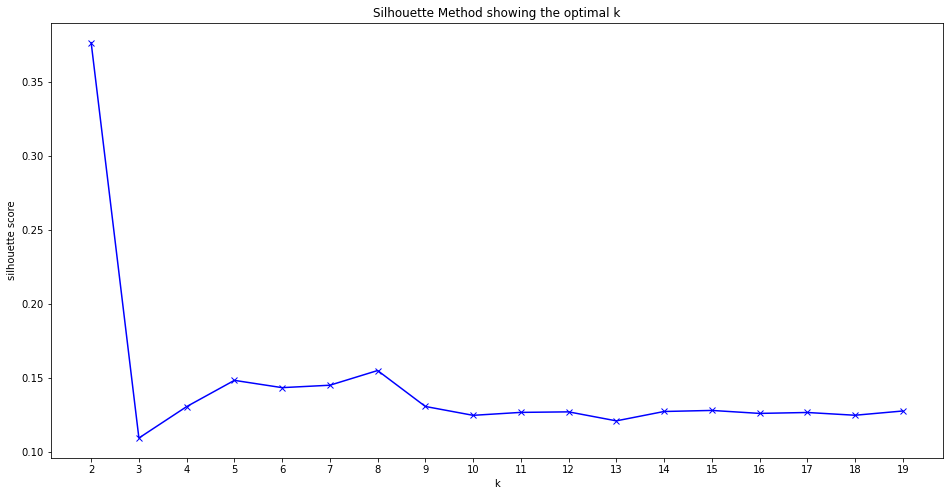

In [25]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [9]:
k=8
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(X_prep)
clusters=kmeans.predict(X_prep)

In [10]:
music_num['clusters']=clusters

In [11]:
music['clusters']=clusters

In [27]:
music_num['clusters'].value_counts()

4    2695
0    1335
1    1243
5     506
2     447
3     447
7     100
6      59
Name: clusters, dtype: int64

In [28]:
cluster_0=music_num[music_num['clusters']==0]

In [29]:
cluster_0.shape

(1335, 14)

In [30]:
cluster_0=cluster_0.drop('clusters',axis=1)

In [49]:
avgc0 = np.mean(cluster_0)

In [50]:
cluster_1=music_num[music_num['clusters']==1]

In [51]:
cluster_1=cluster_1.drop('clusters',axis=1)

In [52]:
avgc1 = np.mean(cluster_1)

In [53]:
cluster_2=music_num[music_num['clusters']==2]

In [54]:
cluster_2=cluster_2.drop('clusters',axis=1)

In [55]:
avgc2 = np.mean(cluster_2)

In [56]:
cluster_3=music_num[music_num['clusters']==3]

In [57]:
cluster_3=cluster_3.drop('clusters',axis=1)

In [58]:
avgc3 = np.mean(cluster_3)

In [59]:
cluster_4=music_num[music_num['clusters']==4]

In [60]:
cluster_4=cluster_4.drop('clusters',axis=1)

In [61]:
avgc4 = np.mean(cluster_4)

In [62]:
cluster_5=music_num[music_num['clusters']==5]

In [63]:
cluster_5=cluster_5.drop('clusters',axis=1)

In [64]:
avgc5 = np.mean(cluster_5)

In [65]:
cluster_6=music_num[music_num['clusters']==6]

In [66]:
cluster_6=cluster_6.drop('clusters',axis=1)

In [67]:
avgc6 = np.mean(cluster_6)

In [68]:
cluster_7=music_num[music_num['clusters']==7]

In [69]:
cluster_7=cluster_7.drop('clusters',axis=1)

In [70]:
avgc7 = np.mean(cluster_7)

In [40]:
music_num

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,clusters
0,0.498,0.949,11,-4.367,0,0.0575,0.000324,0.023200,0.0783,0.517,95.027,180691,3,1
1,0.484,0.807,11,-5.386,1,0.0566,0.002990,0.000012,0.1070,0.253,120.223,180592,4,4
2,0.295,0.911,4,-3.646,1,0.0961,0.000032,0.008090,0.2030,0.456,79.115,218934,4,4
3,0.492,0.935,7,-5.436,1,0.0895,0.000275,0.022700,0.0896,0.603,172.010,159713,4,4
4,0.416,0.879,2,-4.892,1,0.0436,0.000068,0.004730,0.1230,0.401,154.927,210341,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6827,0.854,0.663,1,-2.983,1,0.1160,0.112000,0.000000,0.2800,0.412,126.999,201137,4,0
6828,0.904,0.733,11,-7.036,0,0.3010,0.095100,0.000000,0.1360,0.519,145.012,184040,4,0
6829,0.919,0.734,11,-7.251,0,0.2470,0.059700,0.000000,0.1350,0.500,145.025,184067,4,0
6830,0.841,0.512,0,-4.550,0,0.2760,0.047000,0.000000,0.1280,0.129,140.042,155193,4,0


In [69]:
avgc0

danceability             0.723742
energy                   0.725322
key                      5.318352
loudness                -6.025884
mode                     0.788015
speechiness              0.119677
acousticness             0.097722
instrumentalness         0.007277
liveness                 0.157653
valence                  0.636385
tempo                  118.931414
duration_ms         203139.286142
time_signature           3.991011
clusters                 0.000000
dtype: float64

In [68]:
avgc0[12]

3.9910112359550562

In [81]:
music_num['clusters'][111]

3

In [79]:
new_song = input('Enter a song you would like to hear:')

for i in range(len(music_num)):
    if(new_song.lower() ==music[i].lower()):
        cluster_num = music_num['clusters'][i]
        song_cluster = music_num[music_num['clusters']==cluster_num]
        return random_sample(song_cluster[i])
    else:
        song_search=sp.search(new_song, limit=10, offset=0, type='track', market=None)
        song_deets=[]
        final_list={}
        song_feats=sp.audio_features(tracks=song_search['tracks']['items'][0]['id'])
        #may be a little mix in going from track id to securing audio features
        songdeets=song_feats[0]
        final_list = songdeets

Enter a song you would like to hear:Somebody told me


In [ ]:
song_deets=[]
    final_list={}
    n=0
    for i in song_id_list:
        songdeets=sp.audio_features(tracks=i)[0]
        songdeets['song_name']=song_list[n]
        final_list[i] = songdeets

In [82]:
len(music_num)

6832

In [90]:
try1=sp.search('Somebody told me', limit=10, offset=0, type='track', market=None)

In [91]:
try1.keys()

dict_keys(['tracks'])

In [97]:
try1['tracks']['items'][0]['id']

'6PwjJ58I4t7Mae9xfZ9l9v'

In [102]:
cresults=sp.audio_features(tracks=try1['tracks']['items'][0]['id']) 
cresults[0]

{'danceability': 0.497,
 'energy': 0.97,
 'key': 10,
 'loudness': -4.851,
 'mode': 0,
 'speechiness': 0.0836,
 'acousticness': 9.04e-05,
 'instrumentalness': 0.000674,
 'liveness': 0.101,
 'valence': 0.689,
 'tempo': 138.081,
 'type': 'audio_features',
 'id': '6PwjJ58I4t7Mae9xfZ9l9v',
 'uri': 'spotify:track:6PwjJ58I4t7Mae9xfZ9l9v',
 'track_href': 'https://api.spotify.com/v1/tracks/6PwjJ58I4t7Mae9xfZ9l9v',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6PwjJ58I4t7Mae9xfZ9l9v',
 'duration_ms': 197200,
 'time_signature': 4}

In [73]:
    song_deets=[]
    final_list={}
    n=0
    for i in song_id_list:
        songdeets=sp.audio_features(tracks=i)[0]
        songdeets['tracks']['items'][0]['id']
        songdeets['song_name']=song_list[n]
        final_list[i] = songdeets
        n+=1

In [193]:
best_cluster=music[music['song_name']=='Waiting']['clusters']
best_cluster.values[0]

4

In [26]:
music['song_name'].head(10).values

array(['The Shift', 'The Unknown', 'Waiting', 'Deja Vu', 'Without You',
       'Cut The Cord', 'Planets III', 'Sleep In The Fire', 'I Wish',
       'Start Again'], dtype=object)

In [36]:
new_song = input('Enter a song you like:')
if new_song in list(music['song_name']):
    best_cluster=music[music['song_name']==new_song]['clusters']
    filt_cluster=music[music['clusters']==best_cluster.values[0]].reset_index(drop=True)
    print('Now playing something we think you will like:', random.choice(filt_cluster['song_name']))
else:
    song_feats={}
    songdeets=sp.search(new_song, limit=10, offset=0, type='track', market=None)
    songdeets=sp.audio_features(tracks=songdeets['tracks']['items'][0]['id'])[0]
    song_feats[0]=songdeets
    song_frame=pd.DataFrame(song_feats).T.reset_index()
    song_frame = song_frame.drop(['index','track_href','type','uri','id','analysis_url'],axis=1)
    org_song_frame=song_frame['danceability'], song_frame['energy'], song_frame['key'], song_frame['loudness'], song_frame['mode'], song_frame['speechiness'],song_frame['acousticness'], song_frame['instrumentalness'], song_frame['liveness'], song_frame['valence'], song_frame['tempo'],song_frame['duration_ms'], song_frame['time_signature']
    org_song_frame=pd.DataFrame(org_song_frame)
    song_stats=org_song_frame[0]
    testdist=0
    for j in range(k):
        clusterloop = music_num[music_num['clusters']==j]
        clusterloop=clusterloop.drop('clusters',axis=1)
        clusterloop_center = np.mean(clusterloop)
        for i in range(len(clusterloop_center)):
            testdist=testdist+(song_stats[i]-clusterloop_center[i])**2
            if j==0:
                besttest=testdist
                best_cluster=j
            if (j>0)&(abs(testdist)<abs(besttest)):
                besttest=testdist
                best_cluster=j

    song_pool=music[music['clusters']==best_cluster]
    song_pool=pd.DataFrame(song_pool).reset_index(drop=True)
    print('Now playing', random.choice(song_pool['song_name']))

Enter a song you like:Firework
Now playing How I Live


In [147]:
music.columns

Index(['level_0', 'index', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'song_name'],
      dtype='object')

In [166]:
clusterloop = music_num[music_num['clusters']==2]
clusterloop=clusterloop.drop('clusters',axis=1)
clusterloop_center = np.mean(clusterloop)
len(clusterloop_center)

13

In [152]:
len(music['song_name'])

6832

In [151]:
music['song_name'][342]

'Stick Stickly'

In [143]:
org_song_frame[0]

danceability             0.796000
energy                   0.798000
key                      1.000000
loudness                -6.312000
mode                     1.000000
speechiness              0.031700
acousticness             0.034000
instrumentalness         0.000042
liveness                 0.095200
valence                  0.942000
tempo                  116.032000
duration_ms         202735.000000
time_signature           4.000000
Name: 0, dtype: float64

In [141]:
teststats=org_song_frame
teststats

,0
danceability,0.796000
energy,0.798000
key,1.000000
loudness,-6.312000
mode,1.000000
speechiness,0.031700
acousticness,0.034000
instrumentalness,0.000042
liveness,0.095200
valence,0.942000


In [130]:
clusterloop = np.mean(music_num[music_num['clusters']==0])
len(clusterloop)

14

IndentationError: expected an indented block (<ipython-input-88-44cfc645cf67>, line 8)

In [89]:
clusterloop = music_num[music_num['clusters']==0]

In [96]:
ck=np.mean(clusterloop)

In [101]:
len(ck)

14

In [102]:
ck

danceability             0.723742
energy                   0.725322
key                      5.318352
loudness                -6.025884
mode                     0.788015
speechiness              0.119677
acousticness             0.097722
instrumentalness         0.007277
liveness                 0.157653
valence                  0.636385
tempo                  118.931414
duration_ms         203139.286142
time_signature           3.991011
clusters                 0.000000
dtype: float64

In [100]:
ck[12]

3.9910112359550562

In [148]:
random.choice(music['song_name'])

'Talk #1 - Live'